In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import cv2
from skimage import io, color
%matplotlib inline

In [2]:
path = os.path.dirname(os.path.dirname(os.path.abspath(__name__)))

In [3]:
path

'C:\\a-dev\\kuliah\\peng-cit'

In [4]:
medic = cv2.imread(os.path.join(path, 'image', 'medis.jpg'))

In [5]:
cv2.imshow('real', medic)
cv2.waitKey(0)
cv2.destroyAllWindows()

## convolutional filter

In [6]:
kernel = np.array([
    [-1, 0, -1],
    [0, 4, 0],
    [-1, 0, -1],
])

medic_conv = cv2.filter2D(medic, -1, kernel)

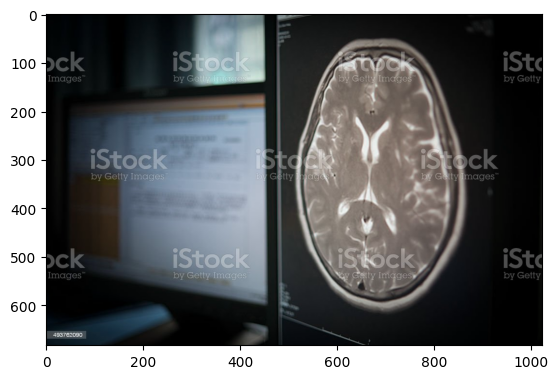

In [7]:
plt.imshow(medic)

### RGB to GRAYSCALE

In [8]:
medic_gray = grayscale = cv2.cvtColor(medic, cv2.COLOR_BGR2GRAY)

In [9]:
cv2.imshow('image', grayscale)
cv2.waitKey(0)
cv2.destroyAllWindows()

### GRAYSCALE to BINARY

In [10]:
thresh, binary = cv2.threshold(grayscale, 128, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [11]:
cv2.imshow('image', binary)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
medic.shape

(683, 1024, 3)

In [13]:
medic[50, 50]

array([1, 5, 6], dtype=uint8)

In [14]:
binary[50, 50]

0

In [15]:
medic_gray[50, 50]

5

# HISTOGRAM

In [16]:
row, col = medic.shape[:2]

In [17]:
hist = cv2.calcHist([medic], [0], None, [256], [0, 256])

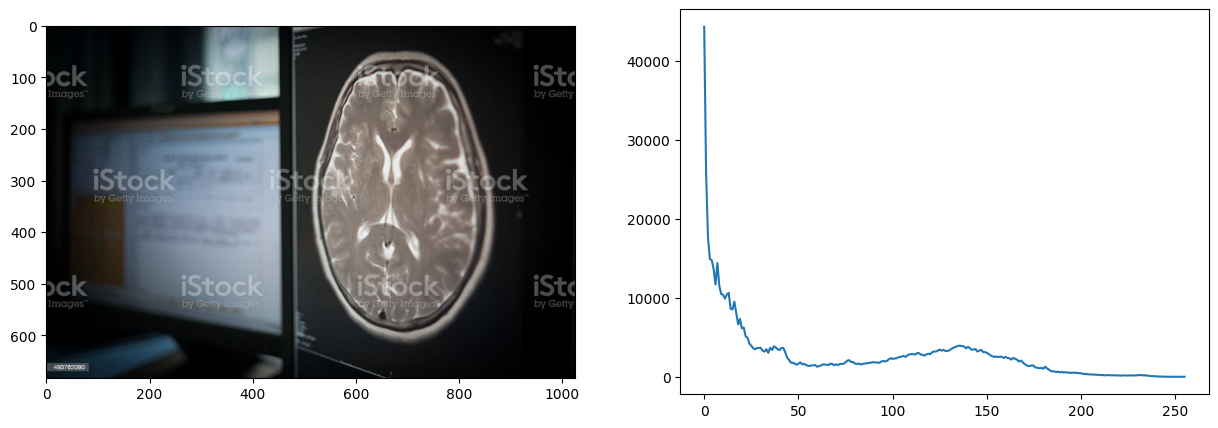

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(medic)
axs[1].plot(hist)

In [19]:
img = cv2.cvtColor(medic, cv2.COLOR_BGR2RGB)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

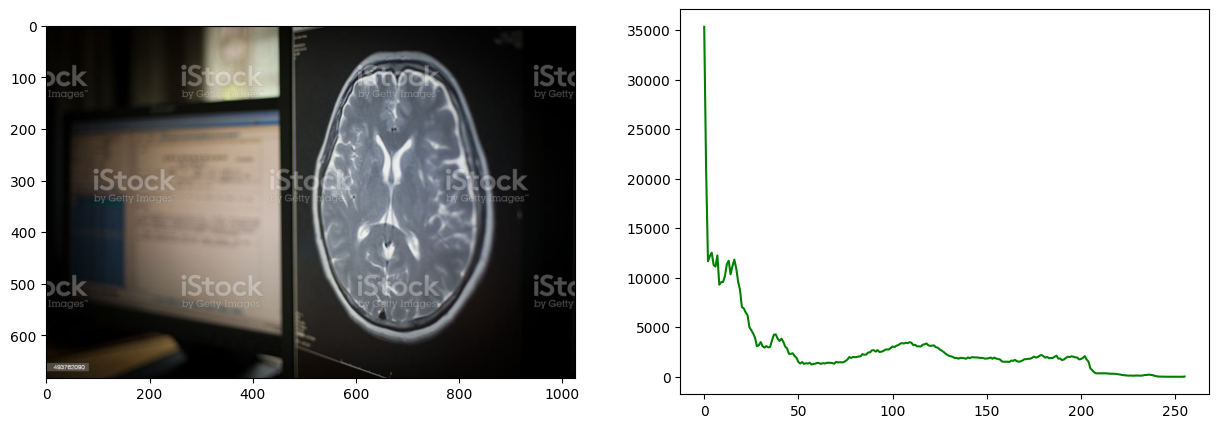

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(img)
axs[1].plot(hist, color='g')

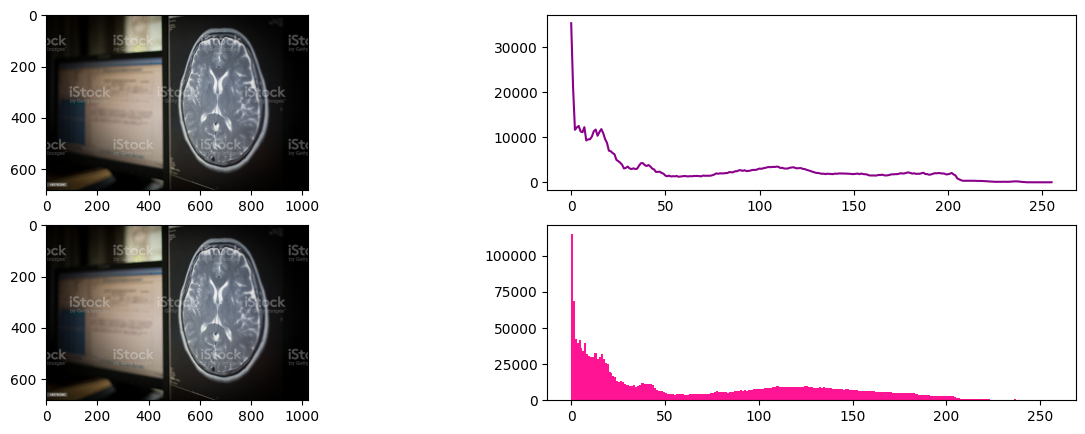

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(15, 5))
axs[0, 0].imshow(img)
axs[0, 1].plot(hist, color='#8B008B')

axs[1, 0].imshow(img)
axs[1, 1].hist(img.ravel(), 256, [0, 256], color='#FF1493')
plt.show()

(array([3.5315e+04, 2.1982e+04, 1.3086e+04, 1.2296e+04, 1.4727e+04,
        1.0806e+04, 1.0998e+04, 1.4404e+04, 1.0236e+04, 1.0520e+04,
        9.9470e+03, 9.1590e+03, 1.1018e+04, 1.1054e+04, 9.4730e+03,
        9.9910e+03, 1.1653e+04, 9.4470e+03, 8.3600e+03, 1.0381e+04,
        6.2840e+03, 5.5830e+03, 5.5530e+03, 4.8490e+03, 4.8030e+03,
        4.8530e+03, 4.7690e+03, 4.6840e+03, 3.6710e+03, 3.4600e+03,
        3.4990e+03, 3.7210e+03, 3.2060e+03, 3.3640e+03, 3.7330e+03,
        3.1630e+03, 3.3130e+03, 4.6630e+03, 3.8780e+03, 4.1060e+03,
        3.6390e+03, 4.0590e+03, 4.2470e+03, 3.5370e+03, 2.6600e+03,
        2.4850e+03, 2.6680e+03, 2.5430e+03, 1.9900e+03, 1.9020e+03,
        1.5610e+03, 1.4400e+03, 1.3180e+03, 1.2400e+03, 1.3370e+03,
        1.3040e+03, 1.3200e+03, 1.2770e+03, 1.1510e+03, 1.2950e+03,
        1.3470e+03, 1.3240e+03, 1.2480e+03, 1.1620e+03, 1.1140e+03,
        1.2170e+03, 1.2750e+03, 1.2920e+03, 1.1760e+03, 1.2800e+03,
        1.3380e+03, 1.2820e+03, 1.4080e+03, 1.46

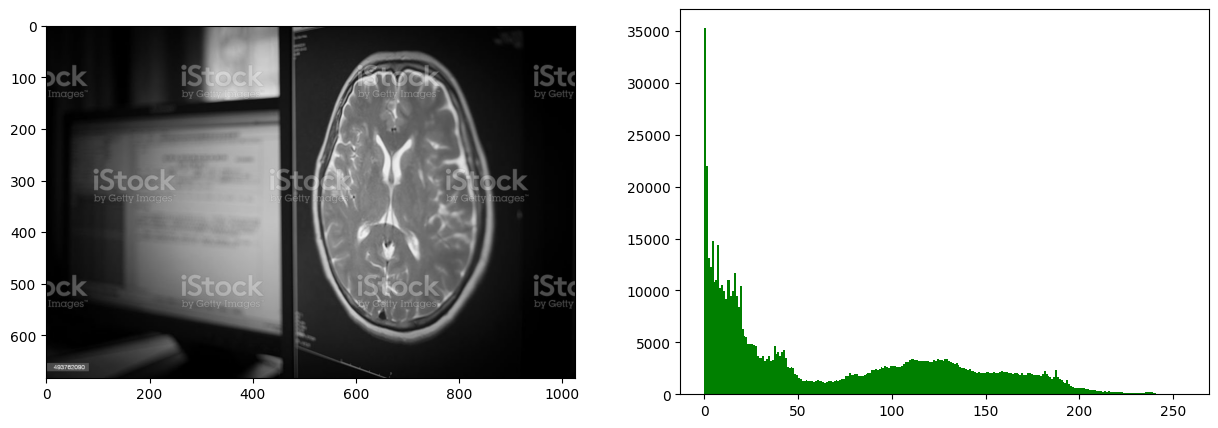

In [22]:
hist2 = cv2.equalizeHist(medic_gray)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(cv2.cvtColor(medic_gray, cv2.COLOR_BGR2RGB))
axs[1].hist(medic_gray.ravel(), 256, [0, 256], color='g')

### DI CERAHKAN

In [23]:
beta = 35
bright = np.zeros((row, col, 3))

for x in range(row):
    for y in range(col):
        temp = img[x, y] + beta
        bright[x, y] = temp

bright = bright.astype(np.uint8)

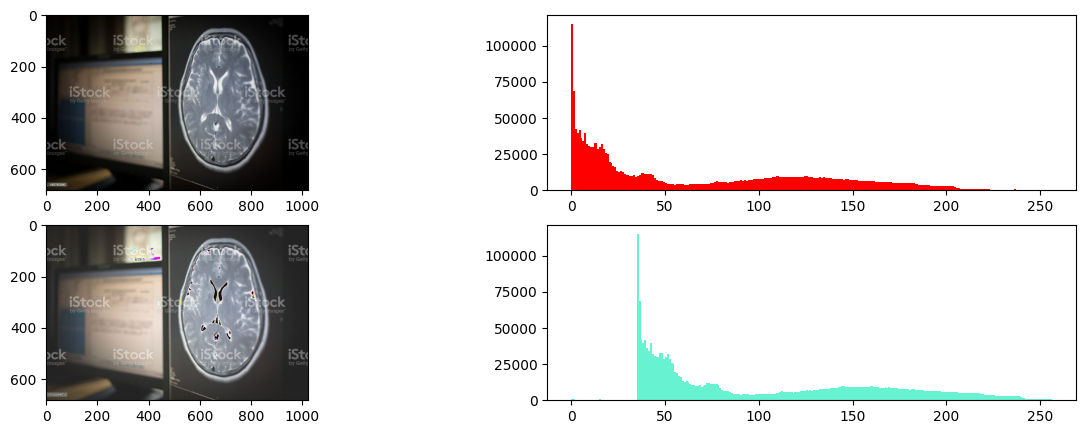

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(15, 5))
axs[0, 0].imshow(img)
axs[0, 1].hist(img.ravel(), 256, [0, 256], color='red')

axs[1, 0].imshow(bright)
axs[1, 1].hist(bright.ravel(), 256, [0, 256], color='#67f2d1')
plt.show()

## MEREGANGKAN KECERAHAN

In [25]:
beta = 40
alpha = 1.2
result = np.zeros((row, col, 3))

for x in range(row):
    for y in range(col):
        gyx = alpha * img[x, y] + beta
        result[x,y] = gyx

result = result.astype(np.uint8)

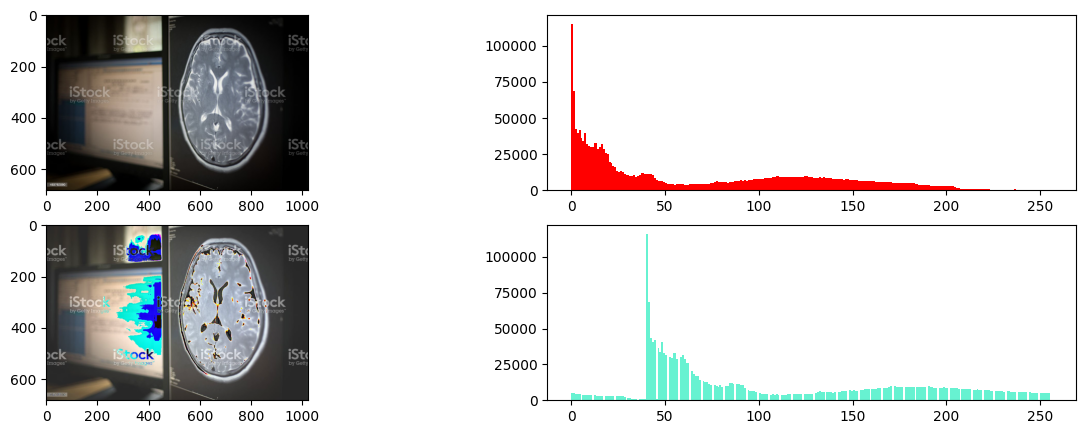

In [26]:
fig, axs = plt.subplots(2, 2, figsize=(15, 5))
axs[0, 0].imshow(img)
axs[0, 1].hist(img.ravel(), 256, [0, 256], color='red')

axs[1, 0].imshow(result)
axs[1, 1].hist(result.ravel(), 256, [0, 256], color='#67f2d1')
plt.show()

## MENAMBAHKAN KONTRAS

In [27]:
alpha = 1.2
contrast = np.zeros((row, col, 3))

for x in range(row):
    for y in range(col):
        gyx = alpha * img[x, y]
        contrast[x,y] = gyx

contrast = contrast.astype(np.uint8)

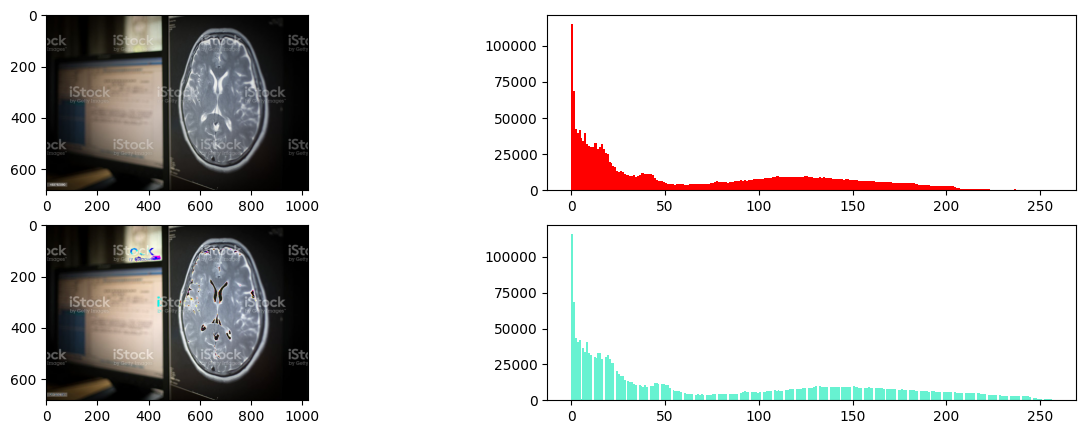

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(15, 5))
axs[0, 0].imshow(img)
axs[0, 1].hist(img.ravel(), 256, [0, 256], color='red')

axs[1, 0].imshow(contrast)
axs[1, 1].hist(contrast.ravel(), 256, [0, 256], color='#67f2d1')
plt.show()

## MENGKOMBINASIKAN KONTRAS DAN KECERAHAN

In [29]:
combined = contrast + bright

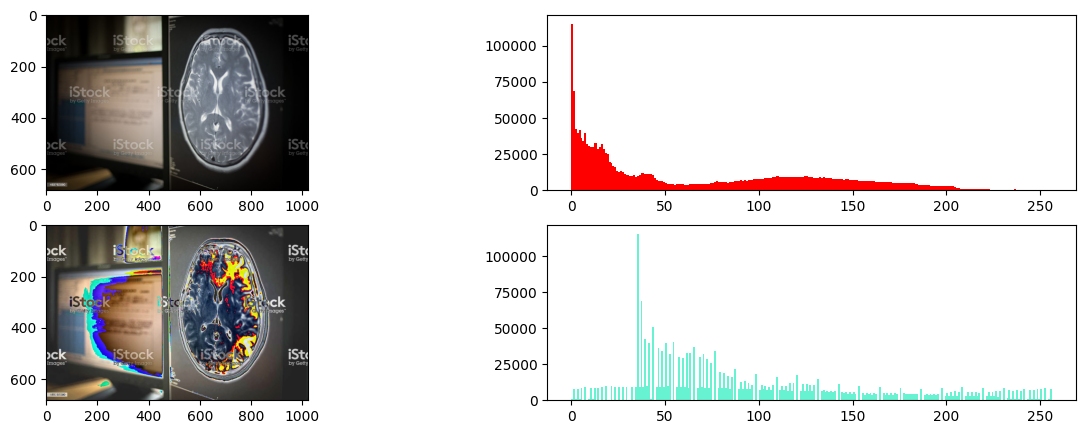

In [30]:
fig, axs = plt.subplots(2, 2, figsize=(15, 5))
axs[0, 0].imshow(img)
axs[0, 1].hist(img.ravel(), 256, [0, 256], color='red')

axs[1, 0].imshow(combined)
axs[1, 1].hist(combined.ravel(), 256, [0, 256], color='#67f2d1')
plt.show()